# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [ ]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

**DO NOT** ```import *```. As your programs get more complex you will generally need to import a greater range of modules, and it's important to keep them separate.

# Introduction
Most physicists are unlikely to go gambling at Monte Carlo - even if they were paid enough. Our knowledge of statistics is sufficient warning. But that doesn’t stop physicists using the _Monte Carlo method_ extensively for maths and physics problems.

As the name suggests, the Monte Carlo (MC) method is based on using randomness. At first sight, this seems counter intuitive - surely random numbers can only lead to more randomness? As a very simple illustration of how to use random numbers in a calculation, consider the following problem.

Suppose you have a circular pond of of unit radius, placed exactly in a square area of grass.

Imagine throwing $N$ stones randomly into the square area. What number $n$ would land in the pond? Clearly we know the theoretical answer in this case - it just depends on the ratio area of the pond and square, so $n = N\pi/4$. But suppose you didn’t already know a value for $\pi$. Then by finding the ratio $4n/N$ you will have an approximation to $\pi$ which depends only on using random numbers (and, as we’ll see shortly, Pythagoras’ theorem).

To implement this idea in python you can make use of the following code snippet:

In [ ]:
N=int(1e6)
n=0
for i in range (N):
    x = 2*random()-1
    y = 2*random()-1
    r = np.sqrt(x*x+y*y)
    if r <= 1.0:
        n+=1 # adds 1 to n
print(4*n/N)

3.142332


The function random returns a random real number uniformly distributed in the range $[0,1)$, so $x$ and $y$ lie in the range $[-1,1)$ here. Investigate what value of $\pi$ you get, and how it depends on the number $N$ that you pick. (You could repeat for different values of $N$ and plot a graph of $\pi$ versus $N$.) Note that you don’t really need to take the square root in this case as we are dealing with a unit circle. (We could equally just take a circular quadrant instead of a whole circle if we use random number in the interval 0 to 1)

The example above can take some time to run. But the code below, which does the same operations, is much faster:

In [ ]:
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

For the most part the increased speed is due to using _vector instructions_ built-in the `numpy` library. Those cannot be used by a `for` loop.

## Measuring execution speed

To measure the speed of a piece of code, if you are uring IPython/Jupyter (as Colab does), the IPython [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) command `%%time` is very useful:

In [ ]:
%%time

x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

3.143996
CPU times: user 31 ms, sys: 0 ns, total: 31 ms
Wall time: 31.5 ms


Note that the similar-sounding `%%timeit` command will run the cell several time and calculate the average. In the absence of IPython, you can also use the `datetime` module:

In [ ]:
from datetime import datetime
startTime = datetime.now()
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)
print(datetime.now() - startTime)

3.13824
0:00:00.031870


## How random?
It is interesting to plot out some generated random numbers to get a feel for how random they look. You already saw in week 3 of the PX1224 module how to plot out histograms. So we can do something like this...

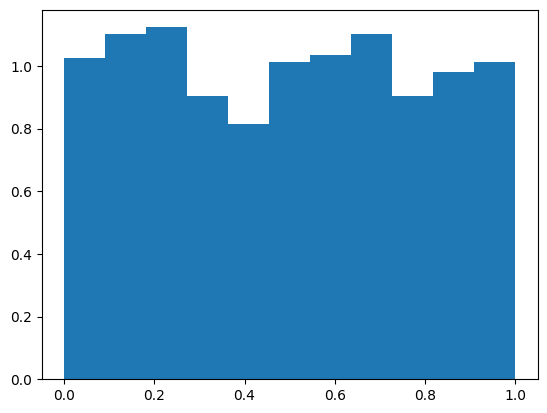

In [ ]:
# make the uniform random data ...
N = int(1e3)
x = np.zeros(N)
for i in range(N): # very slow to loop like this
    x[i] = random()
# the histogram of the data
plt.hist(x, bins='auto',density=True);

And a neater way to create an array of N random numbers is like this ...

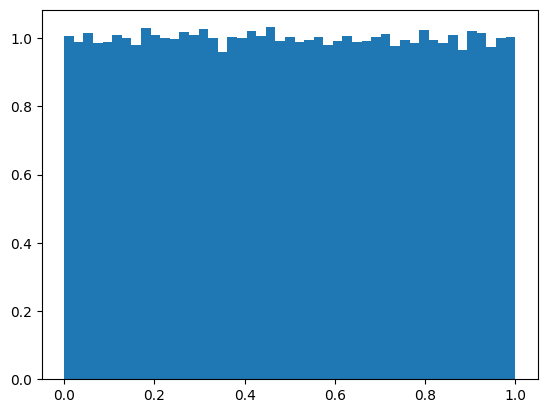

In [ ]:
# make the uniform random data ...
N = int(1e5)
x = random(N)
plt.hist(x, bins='auto',density=True);

You’ll see that, to the eye, the data look very uniformly distributed. How are random numbers generated in the computer? In fact, they are not entirely random, but are generated by an algorithm that produces a sequence of numbers that is _pseudo-random_. A great deal of research goes into generating pseudo-random numbers that pass known tests for randomness (rather more sophisticated than just looking at histograms). Take a look at http://www.random.org/ if you want truly random numbers.
One advantage of pseudo-random number generation is that you can always generate the same sequence of numbers again for testing purposes! This is done by using a starting seed. To do this the syntax is:
```python
seed(1234)
```
where you can use any convenient integer starting seed.

## Other probability distributions

The [numpy and scipy documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions) website gives a good description of other random number distributions, not just the uniform one we’ve looked at so far. For example `y = normal(loc=0.0, scale=1.0, size=N)` will return an array of $N$ numbers with a Gaussian or normal probability distribution, with mean $\mu = 0$ and standard deviation $\sigma = 1$.

# Applications

## Integration in 1-D

One application of the MC method is to the evaluation of integrals. Suppose we select $N$ random numbers $x_0,x_1,x_2,...,x_{N-1}$ in the interval $[0,1)$, then
$$
\int_0^1 f(x)\,dx\approx\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
This is not the best method in 1-D, since the error in the approximation is of order $1/\sqrt{N}$, and many more points are required for a good estimate of the integral than, for example, the Romberg method. But it turns out to be increasingly beneficial in higher dimensions.

Let’s look at a trivial example. We want to integrate $f(x) = x^2$ between 0 and 1. The relevant code snippet is something like this:

In [ ]:
def f(x):
    return x**2

N = int(1e3)
s = 0 # s is the sum
for i in range (N):
    x = random() # get a random number in [0,1) ...
    s += f(x)
integral = s/N
print('Approximate result for {} points: {}'.format(N,integral))

Approximate result for 1000 points: 0.34257401767798207


It’s fairly clear why this works, since $s/N$ will be the average value of the function. Multiplying by the interval length, $1$ in this example, thus approximates the integral. If we want the integral between limits (a,b), we would have to multiply the average of the function over this interval by (b-a).
$$
\int_a^b f(x)\,dx\approx(b-a)\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
Note: **You need to improve the code** by avoiding the loop (i.e. using the vectorised form of
defining random numbers).

## Integration in 2-D

**Simplest case**: It’s easy to extend this idea to 2-D (and higher dimensions). If we have
a 2-D rectangular region $a \leq x \leq b$, $c \leq y \leq d$ then
$$
\int_a^b\int_c^d f(x,y)\,dxdy\approx\frac{(b-a)(c-d)}{N}\sum_{i=0}^{N-1}f(x_i,y_i)
$$
If the region - call it $\Omega$ - is not rectangular, we simply find the average over the region, then multiply by the area $A_\Omega$ of the region.

**General case**: Sometimes it’s hard to know the area of the region (because it is not a
simple shape or is defined by equations) but we can easily extend this idea as follows:

Simply define a rectangular region R (of _known_ area $A_R$) which contains $\Omega$ (This is what we did in the introduction):

![regions](https://raw.githubusercontent.com/PX2134/images/master/week6/regions.png)

Select $N$ points randomly in $R$. If $n$ of these points turn out to be within $\Omega$, then the area of region $\Omega$ is approximately $(n/N)A_R$. Our integral is thus
$$
\int\int_\Omega f(x,y)\,dxdy\approx\left(\frac{n}{N}A_R\right)\frac{1}{n}\sum_{i\in\Omega}f(x_i,y_i)
$$
where the notation $i\in\Omega$ means points $i$ which are within the region $\Omega$. If we integrate the function $f(x, y) = 1$ then this would let us calculate the unknown area of the region $\Omega$. If $f(x, y)$ were the _density_ of the region, then the integral would give us its _mass_.

Another way of deriving the equation above is to cancel out the $n$ and note that $A_R/N$ is just the average area that each point occupies in the plane. The double integral is thus (approximately) the average area per point multiplied by the sum of $f$ values within $\Omega$.

## Integration in 3-D
You can guess the rest! Again note here that if we integrate the function $f(x, y, z) = 1$ then it would give us the volume of a region. If $f(x, y, z)$ were the _density_ of the region, then the integral would give us its _mass_. Can you see how _moment of inertia_ could be calculated?

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video of integrating a function using the Monte Carlo method.

## Exercise 1

[4] Plot histograms using the uniform and normal distribution random number generators. Investigate how the histograms depend on the number of points
taken.

In [ ]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of Uniform Random Numbers: N=100')

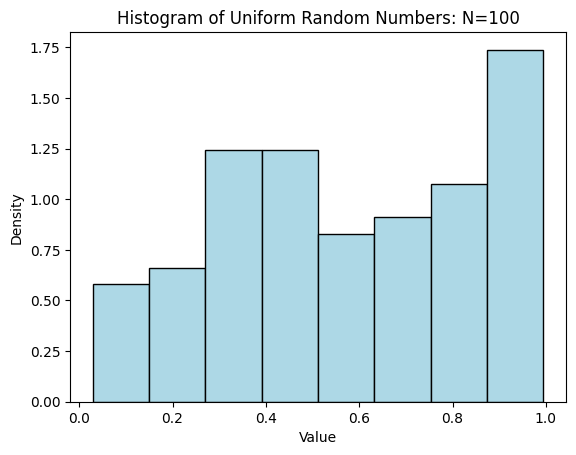

In [ ]:
# generate uniform random numbers
N = 100 # choose relatively low value
x = random(N)

# plot histogram
plt.hist(x, bins='auto', density=True, edgecolor='black', color='lightblue');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Uniform Random Numbers: N=100')

Text(0.5, 1.0, 'Histogram of Uniform Random Numbers: N=1,000,000')

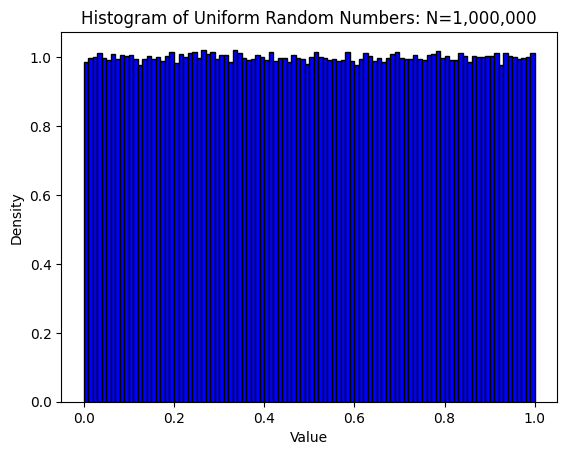

In [ ]:
# generate again but more values
N2 = int(1e6)  # choose higher value
x2 = random(N2)

# plot histogram
plt.hist(x2, bins='auto', density=True, edgecolor='black', color='blue');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Uniform Random Numbers: N=1,000,000')

Text(0.5, 1.0, 'Histogram of Uniform Random Numbers: N=10,000')

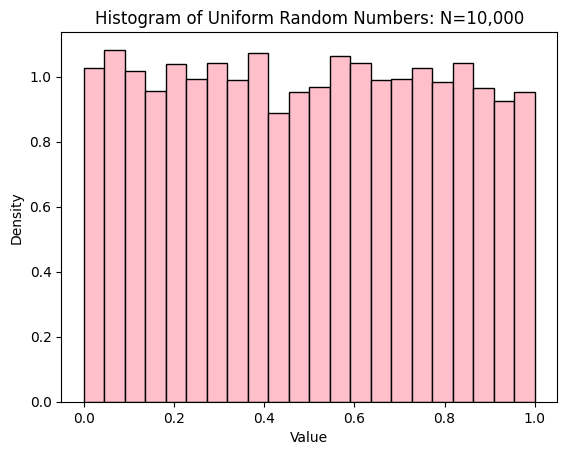

In [ ]:
# generate again
N3 = int(1e4)
x3 = random(N3)

# plot histogram
plt.hist(x3, bins='auto', density=True, edgecolor='black', color='pink');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Uniform Random Numbers: N=10,000')

Text(0.5, 1.0, 'Histogram of Uniform Random Numbers: N=100,000,000')

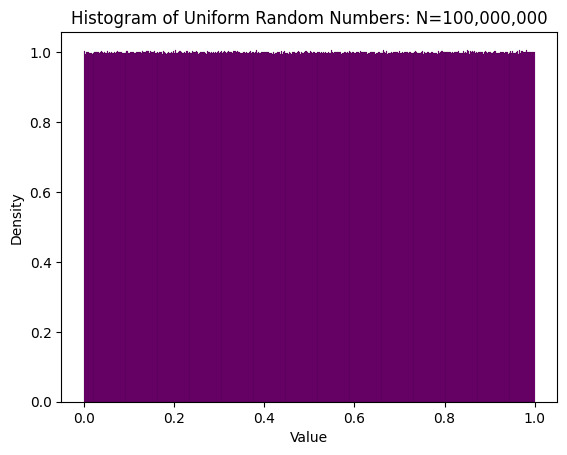

In [ ]:
# generate again
N4 = int(1e8)
x4 = random(N4)

# plot histogram
plt.hist(x4, bins='auto', density=True, edgecolor='black', linewidth=0.1, color='purple');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Uniform Random Numbers: N=100,000,000')

In [ ]:
print('For a lower value of N (number of points), the historam is not uniform.')
print('For a higher value of N (number of points), the historam is more uniform, as expected.')
print('As the value of N tends to infinity, there will be a perfect uniform distribution, indicated by the purple histogram.')

For a lower value of N (number of points), the historam is not uniform.
For a higher value of N (number of points), the historam is more uniform, as expected.
As the value of N tends to infinity, there will be a perfect uniform distribution, indicated by the purple histogram.


Text(0.5, 1.0, 'Histogram of Normal Random Numbers: N=100')

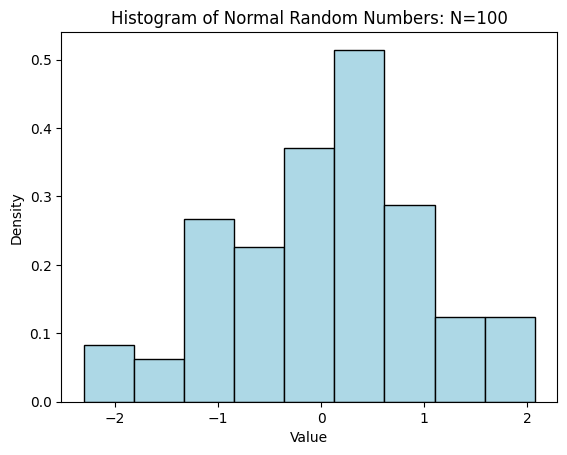

In [ ]:
# generate normal random numbers
N5 = 100 # choose relatively low value
x5 = normal(loc=0.0, scale=1, size=N5)

# plot histogram
plt.hist(x5, bins='auto', density=True, edgecolor='black', color='lightblue');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Random Numbers: N=100')

Text(0.5, 1.0, 'Histogram of Normal Random Numbers: N=1,000,000')

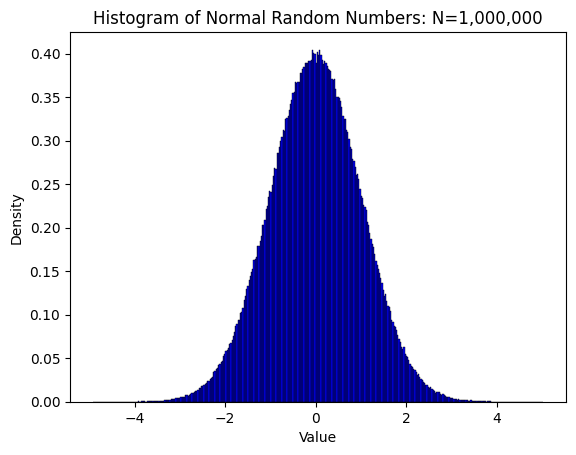

In [ ]:
# generate normal random numbers
N6 = int(1e6) # choose higher value
x6 = normal(loc=0.0, scale=1, size=N6)

# plot histogram
plt.hist(x6, bins='auto', density=True, edgecolor='black', linewidth=0.3, color='blue');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Random Numbers: N=1,000,000')

Text(0.5, 1.0, 'Histogram of Normaal Random Numbers: N=10,000')

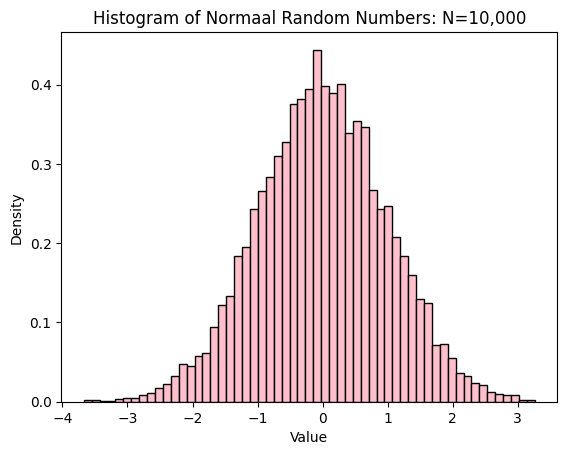

In [ ]:
# generate more
N7 = int(1e4) # choose higher value
x7 = normal(loc=0.0, scale=1, size=N7)

# plot histogram
plt.hist(x7, bins='auto', density=True, edgecolor='black', color='pink');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Random Numbers: N=10,000')

Text(0.5, 1.0, 'Histogram of Normal Random Numbers: N=100,000,000')

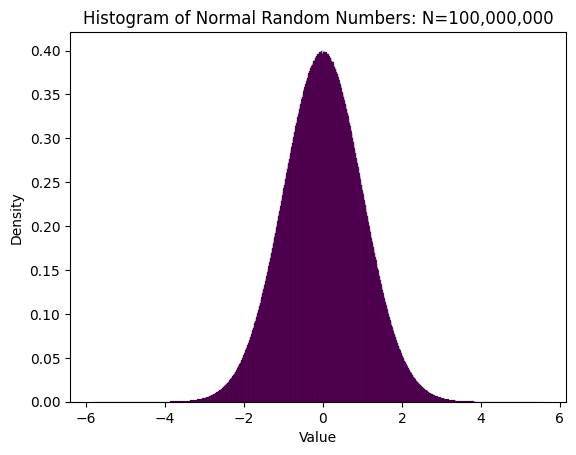

In [ ]:
# generate more
N8 = int(1e8) # choose higher value
x8 = normal(loc=0.0, scale=1, size=N8)

# plot histogram
plt.hist(x8, bins='auto', density=True, edgecolor='black', linewidth=0.1, color='purple');
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Random Numbers: N=100,000,000')

In [ ]:
print('For a lower value of N (number of points), the historam is not a smooth normal curve.')
print('For a higher value of N (number of points), the historam is more smooth.')
print('As the value of N tends to infinity, there will be a perfect normal distribution, indicated by the purple histogram, which is very smooth.')

For a lower value of N (number of points), the historam is not a smooth normal curve.
For a higher value of N (number of points), the historam is more smooth.
As the value of N tends to infinity, there will be a perfect normal distribution, indicated by the purple histogram, which is very smooth.


## Exercise 2

[7] Find $\pi$ using the method described in the introduction and plot a unit square to illustrate points which lie within the unit circle. It’s much faster to use the second method of making the random numbers, `x=random(N)`. You should plot data points within the circle in blue and those outside in green. Adapt code similar to that below to do the plotting.
```python
inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond
plt.plot(x[inpond==True], y[inpond==True],'b.')
```
 Compare the speed between using a `for` loop and using the vectorised `x=random(N)`.

## Exercise 3

[9] Integrate $f(x) = sin(x)tan(x)$ between $0$ and $\pi/4$ using the MC method, and compare with the exact answer (obtained for instance via [WolframAlpha](https://www.wolframalpha.com/)). Investigate what happens with increasing the number of points $N$ you use by plotting the MC answer versus number of points, choosing appropriate values for $N$ and choice of axes.

 To get full marks you must avoid using a loop in the integration (but you can loop over different values of $N$).

In [1]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

In [80]:
# first define function
def f(x):
  '''
  returns f(x) = sin(x)tan(x)
  '''
  return np.sin(x)*np.tan(x)

# MC method integration
N_int = 100 # choose low value to start with
s_int = 0 # s is the sum, starts at 0
a = 0 # lower limit of integration
b = np.pi/4 # upper limit of integration

# loop through every value of N
for i in range (N_int):
    x_int = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int += f(x_int)
integral = (b-a) * s_int/N_int # multiply by interval length

# print result
print(f'Approximate result for 100 points: {format(integral)}')
print('The exact value obtained from WolframAlpha is 0.1743.')
print('The values produced are in a similar region to the exact value, but tend to deviate quite a bit, so it is not yet accurate.')
print('To obtain a more accurate value, the number of points N needs to be increased.')

Approximate result for 100 points: 0.16328029445494996
The exact value obtained from WolframAlpha is 0.1743.
The values produced are in a similar region to the exact value, but tend to deviate quite a bit, so it is not yet accurate.
To obtain a more accurate value, the number of points N needs to be increased.


In [77]:
# MC method again with higher N
N_int2 = int(1e4) # choose higher value
s_int2 = 0 # s is the sum, starts at 0

# loop through every value of N
for i in range (N_int2):
    x_int2 = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int2 += f(x_int2)
integral2 = (b-a) * s_int2/N_int2 # multiply by interval length

# print result
print(f'Approximate result for 10,000 points: {format(integral2)}')
print('After printing multiple values for N=10,000, it is clear that this value is more accurate.')
print('The values are almost always consistent with the true value to 2 decimal places.')

Approximate result for 10,000 points: 0.17375258502412821
After printing multiple values for N=10,000, it is clear that this value is more accurate.
The values are almost always consistent with the true value to 2 decimal places.


In [78]:
# MC method again with higher N
N_int3 = int(1e6) # choose an again higher value
s_int3 = 0 # s is the sum, starts at 0

# loop through every value of N
for i in range (N_int3):
    x_int3 = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int3 += f(x_int3)
integral3 = (b-a) * s_int3/N_int3 # multiply by interval length

# print result
print(f'Approximate result for 1,000,000 points: {format(integral3)}')
print('After printing multiple values for N=1,000,000, it is clear that this value is once again more accurate.')
print('The values are almost always consistent with the true value to 3 decimal places.')

Approximate result for 1,000,000 points: 0.17432622985479865
After printing multiple values for N=1,000,000, it is clear that this value is once again more accurate.
The values are almost always consistent with the true value to 3 decimal places.


In [70]:
# MC method again with higher N
N_int4 = int(1e7) # choose an again higher value
s_int4 = 0 # s is the sum, starts at 0

# loop through every value of N
for i in range (N_int4):
    x_int4 = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int4 += f(x_int4)
integral4 = (b-a) * s_int4/N_int4 # multiply by interval length

# print result
print(f'Approximate result for 10,000,000 points: {format(integral4)}')
print('These values are also consistent with the true value to 3 decimal places.')
print('Due to the use of a loop, it takes a while to compute the integral at N values of higher values.')

Approximate result for 10,000,000 points: 0.17424973298912125
These values are also consistent with the true value to 3 decimal places.
Due to the use of a loop, it takes a while to compute the integral at N values of higher values.


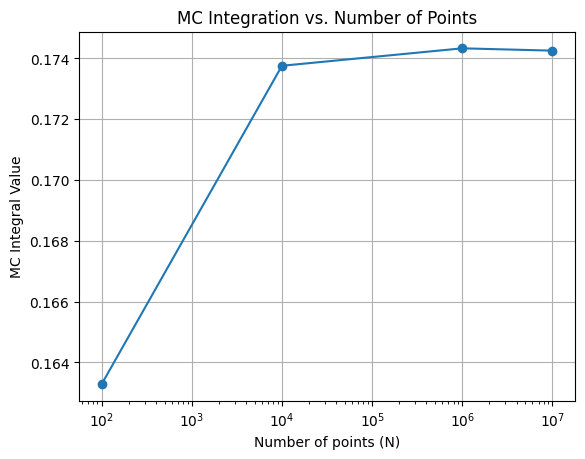

In [81]:
# plotting graph of MC integration against number of points

# first create arrays using computed data
MC_values = np.array([integral, integral2, integral3, integral4])
N_values = np.array([N_int, N_int2, N_int3, N_int4])

# plot graph
plt.plot(N_values, MC_values, 'o-')
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('Number of points (N)') # add x-axis label
plt.ylabel('MC Integral Value') # add y-axis label
plt.title('MC Integration vs. Number of Points') # add title
plt.grid(True) # add a grid

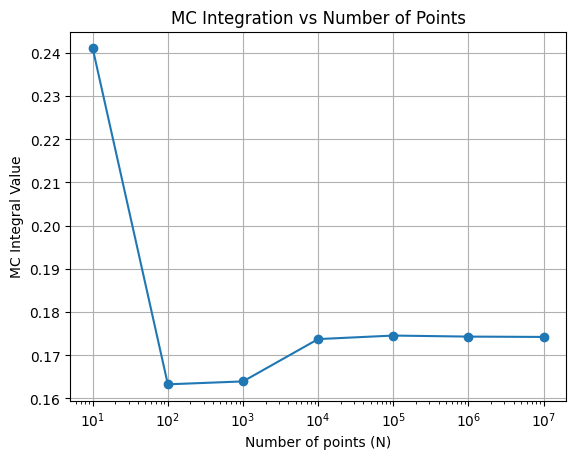

In [99]:
# more integration values can be added, such as N=1000, 100,000 and 10

# N=10
N_int5 = 10
s_int5 = 0

# loop through every value of N
for i in range (N_int5):
    x_int5 = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int5 += f(x_int5)
integral5 = (b-a) * s_int5/N_int5 # multiply by interval length

# N=1000
N_int6 = int(1e3) # Corrected N_int6 to 1000
s_int6 = 0

# loop through every value of N
for i in range (N_int6):
    x_int6 = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int6 += f(x_int6)
integral6 = (b-a) * s_int6/N_int6 # multiply by interval length

# N=100,000
N_int7 = int(1e5)
s_int7 = 0

# loop through every value of N
for i in range (N_int7):
    x_int7 = (b-a) * random() # get a random number in in range 0 to pi/4
    s_int7 += f(x_int7)
integral7 = (b-a) * s_int7/N_int7 # multiply by interval length


# update arrays
MC_values = np.array([integral, integral2, integral3, integral4, integral5, integral6, integral7])
N_values = np.array([N_int, N_int2, N_int3, N_int4, N_int5, N_int6, N_int7])

# sort the arrays based on N_values (ascending order)
sort_indices = np.argsort(N_values)
N_values_sorted = N_values[sort_indices]
MC_values_sorted = MC_values[sort_indices]

# plot final graph
plt.plot(N_values_sorted, MC_values_sorted, 'o-')
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('Number of points (N)')
plt.ylabel('MC Integral Value')
plt.title('MC Integration vs Number of Points')
plt.grid()

In [ ]:
# now try a diferent way, using logspace to create N values, and not using a loop in the integration

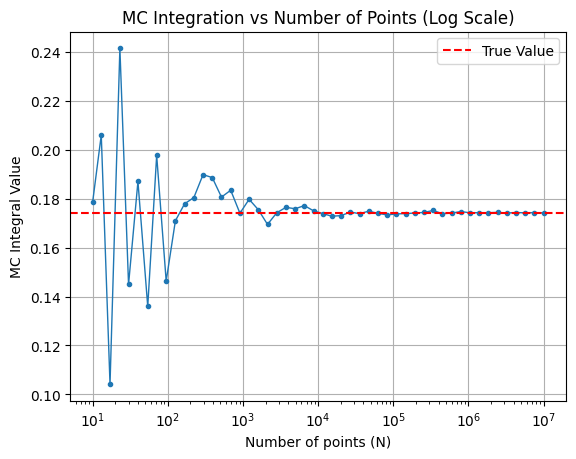

In [120]:
# MC method integration without loop, for different N values using logspace (for which a loop can be used)

a = 0             # state limits again
b = np.pi/4

# generate a range of N values on a log scale
N_array = np.logspace(1, 7, num=50, dtype=int) # N from 10 to 1e7

# array to store result
MC_array = []

# loop through different N values
for N_values in N_array:
    # generate N_values random numbers in the range 0 to pi/4
    x_values = (b-a) * random(N_values)

    # calculate the function value for each random number
    f_values = f(x_values)

    # calculate the integral using a no loop approach
    integral_value = (b-a) * np.mean(f_values)

    MC_array.append(integral_value)

# convert to numpy arrays for plotting
MC_array = np.array(MC_array)

# define true value from WolframAlpha
true_value = 0.1743

# plot graph
plt.plot(N_array, MC_array, 'o-', markersize=3, linewidth=1)
plt.axhline(true_value, color='red', linestyle='--', label='True Value')
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('Number of points (N)')
plt.ylabel('MC Integral Value')
plt.title('MC Integration vs Number of Points (Log Scale)')
plt.grid()
plt.legend(loc='upper right')

In [118]:
print('This graph proves that the higher the value of N is, the closer the integration value comes to the real value.')

This graph proves that the higher the value of N is, the closer the integration value comes to the real value.
